# Data Analysis
## Import Libaray

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
df = pd.read_csv('Dataset/emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


## Check the dataset infomations

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


## Count the null data

In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

# Data Pre processing
## Data Visualization

Prediction:  0    3672
1    1500
Name: Prediction, dtype: int64


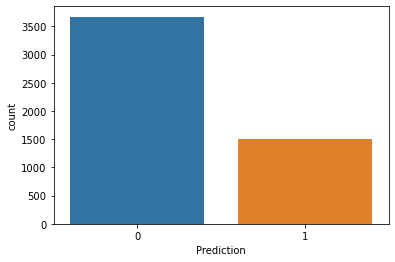

In [5]:
print('Prediction: ',df.Prediction.value_counts())
ax = sns.countplot(data=df,x='Prediction')

## Split the Data

In [6]:
X = df.drop(['Prediction', 'Email No.'], axis=1)
X


,the,to,ect,and,for,of,a,you,hou,in,...,enhancements,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2,2,2,3,0,0,32,0,0,5,...,0,0,0,0,0,0,0,0,0,0
5168,35,27,11,2,6,5,151,4,3,23,...,0,0,0,0,0,0,0,0,1,0
5169,0,0,1,1,0,0,11,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5170,2,7,1,0,2,1,28,2,0,8,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y = df['Prediction']
y

0       0
1       0
2       0
3       0
4       0
       ..
5167    0
5168    0
5169    1
5170    1
5171    0
Name: Prediction, Length: 5172, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [9]:
#Fit and test model function
def fitAndTest(model, X_train, X_test, y_train, y_test):
    fitModel = model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('Training score: {:.3f}'.format(train_score))
    print('Testing score: {:.3f}'.format(test_score))
    return fitModel

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sdScaled = sc.fit_transform(X_train)
X_test_sdScaled = sc.transform(X_test)
X_sdScaled = sc.fit_transform(X)

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_minmaxScaled = sc.fit_transform(X_train)
X_test_minmaxScaled = sc.transform(X_test)
X_minmaxScaled = sc.fit_transform(X)

# Machine Learning Model Building
## Naive Bayes

In [22]:
from sklearn.naive_bayes import MultinomialNB
MNBModel = MultinomialNB()
print('Before scaling:')
MNBModel_NoSca = fitAndTest(MNBModel, X_train, X_test, y_train, y_test)
print('After scaling:')
MNBModel_Sca = fitAndTest(MNBModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)

Before scaling:
Training score: 0.951
Testing score: 0.945
After scaling:
Training score: 0.940
Testing score: 0.931


## Support Vector Machines

In [28]:
from sklearn.svm import SVC
SVCModel = SVC()
print('Before scaling:')
SVCModel_NoSca = fitAndTest(SVCModel, X_train, X_test, y_train, y_test)
print('After scaling:')
print('MinMax Scaling:')
SVCModel_MinMaxSca = fitAndTest(SVCModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)
print('Standard Scaling:')
SVCModel_SdSca = fitAndTest(SVCModel, X_train_sdScaled, X_test_sdScaled, y_train, y_test)

Before scaling:
Training score: 0.784
Testing score: 0.770
After scaling:
MinMax Scaling:
Training score: 0.968
Testing score: 0.916
Standard Scaling:
Training score: 0.961
Testing score: 0.903


## Multi-layer Perceptron Classification

In [14]:
from sklearn.neural_network import MLPClassifier
MLPModel = MLPClassifier()
print('Before scaling:')
MLPModel_NoSca = fitAndTest(MLPModel, X_train, X_test, y_train, y_test)
print('After scaling:')
print('MinMax Scaling:')
MLPModel_MinMaxSca = fitAndTest(MLPModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)
print('Standard Scaling:')
MLPModel_SdSca = fitAndTest(MLPModel, X_train_sdScaled, X_test_sdScaled, y_train, y_test)

Before scaling:
Training score: 1.000
Testing score: 0.980
After scaling:
MinMax Scaling:
Training score: 0.999
Testing score: 0.972
Standard Scaling:
Training score: 1.000
Testing score: 0.968


## Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
LRModel = LogisticRegression()
print('Before scaling:')
LRModel_NoSca = fitAndTest(LRModel, X_train, X_test, y_train, y_test)
print('After scaling:')
print('MinMax Scaling:')
LRModel_MinMaxSca = fitAndTest(LRModel, X_train_minmaxScaled, X_test_minmaxScaled, y_train, y_test)
print('Standard Scaling:')
LRModel_SdSca = fitAndTest(LRModel, X_train_sdScaled, X_test_sdScaled, y_train, y_test)

Before scaling:
Training score: 0.990
Testing score: 0.965
After scaling:
MinMax Scaling:
Training score: 0.978
Testing score: 0.954
Standard Scaling:
Training score: 1.000
Testing score: 0.966


# Model Tuning
## GridSearch

In [17]:
from sklearn.model_selection import GridSearchCV

### Naive Bayes

In [25]:
para_dict = {
    'alpha' : [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(MNBModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.928
Used values: {'alpha': 0.001}


### Support Vector Machines

In [30]:
para_dict = {
    'kernel' : ["linear", "poly", "rbf", "sigmoid"],
    'gamma': ['auto', 'scale'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(SVCModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.960
Used values: {'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}


### Multi-layer Perceptron Classification

In [31]:
para_dict = {
    'hidden_layer_sizes':np.arange(0, 15),
    'solver' :['lbfgs', 'sgd', 'adam'],
    'alpha' :[0.001,0.01,0.1,1,10,100,1000]
    }
MLPModel = MLPClassifier()
grid = GridSearchCV(MLPModel, para_dict, cv=5, scoring='accuracy', return_train_score=False, n_jobs=5)
grid.fit(X_minmaxScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 359, in _fit
    raise ValueError("hidden_layer_sizes must be > 0, got %s." %
ValueError: hidden_layer_sizes must be > 0, got [0].

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/dev02/opt/anaconda3/lib/python3.9/site-packages/sk

The best model s accuracy: 0.965
Used values: {'alpha': 10, 'hidden_layer_sizes': 10, 'solver': 'lbfgs'}


### Logistic Regression

In [32]:
para_dict = {
    'solver' : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    'penalty': ['l1','l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}
grid = GridSearchCV(LRModel, para_dict, cv=5, scoring='accuracy', return_train_score=False)
grid.fit(X_sdScaled, y)
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'params']]
print('The best model s accuracy: {:.3f}'.format(grid.best_score_))
print('Used values:', grid.best_params_)

The best model s accuracy: 0.969
Used values: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


# Evaluation
## Confusion matrix

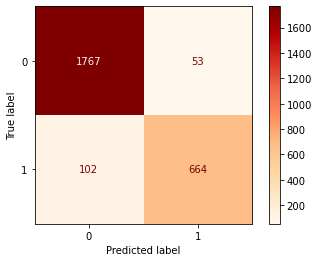

In [37]:
#This is Naive Bayes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
MNBModel = MultinomialNB(alpha=0.001)
MNBModel.fit(X_train_minmaxScaled, y_train)
MNBPrediction = MNBModel.predict(X_test_minmaxScaled)
confusion_matrix(y_test,MNBPrediction)
plot_confusion_matrix(MNBModel,X_test_minmaxScaled,y_test,cmap="OrRd")

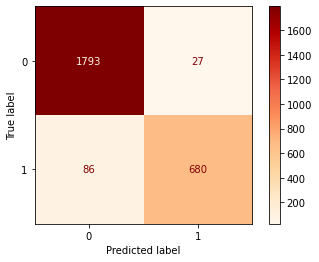

In [43]:
#This is Support Vector Machines
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
SVCModel = SVC(C=1000, gamma='auto', kernel='rbf')
SVCModel.fit(X_train_minmaxScaled, y_train)
SVCPrediction = SVCModel.predict(X_test_minmaxScaled)
confusion_matrix(y_test,SVCPrediction)
plot_confusion_matrix(SVCModel,X_test_minmaxScaled,y_test,cmap="OrRd")

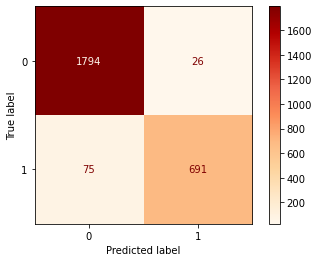

In [42]:
#This is Multi-layer Perceptron Classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
MLPModel = MLPClassifier(alpha=10, hidden_layer_sizes=10, solver='lbfgs')
MLPModel.fit(X_train_minmaxScaled, y_train)
MLPPrediction = MLPModel.predict(X_test_minmaxScaled)
confusion_matrix(y_test,MLPPrediction)
plot_confusion_matrix(MLPModel,X_test_minmaxScaled,y_test,cmap="OrRd")

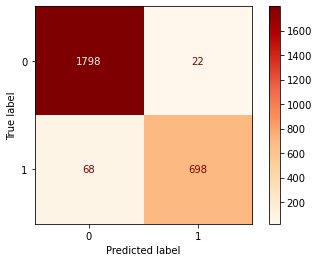

In [48]:
#This is LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
LRModel = LogisticRegression(C = 0.01, penalty= 'l2', solver= 'newton-cg')
LRModel.fit(X_train_sdScaled, y_train)
LRPrediction = LRModel.predict(X_test_sdScaled)
confusion_matrix(y_test,LRPrediction)
plot_confusion_matrix(LRModel,X_test_sdScaled,y_test,cmap="OrRd")

## Metrics

In [45]:
#This is Naive Bayes Metrics
from sklearn.metrics import classification_report
cReport = classification_report(y_test, MNBPrediction)
print(cReport)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1820
           1       0.93      0.87      0.90       766

    accuracy                           0.94      2586
   macro avg       0.94      0.92      0.93      2586
weighted avg       0.94      0.94      0.94      2586



In [46]:
#This is Support Vector Machines Metrics
from sklearn.metrics import classification_report
cReport = classification_report(y_test, SVCPrediction)
print(cReport)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1820
           1       0.96      0.89      0.92       766

    accuracy                           0.96      2586
   macro avg       0.96      0.94      0.95      2586
weighted avg       0.96      0.96      0.96      2586



In [47]:
#This is Multi-layer Perceptron Classification Metrics
from sklearn.metrics import classification_report
cReport = classification_report(y_test, MLPPrediction)
print(cReport)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1820
           1       0.96      0.90      0.93       766

    accuracy                           0.96      2586
   macro avg       0.96      0.94      0.95      2586
weighted avg       0.96      0.96      0.96      2586



In [49]:
#This is LogisticRegression Metrics
from sklearn.metrics import classification_report
cReport = classification_report(y_test, LRPrediction)
print(cReport)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1820
           1       0.97      0.91      0.94       766

    accuracy                           0.97      2586
   macro avg       0.97      0.95      0.96      2586
weighted avg       0.97      0.97      0.96      2586



## Cross Validation

In [51]:
from sklearn.model_selection import cross_val_score
def CVScore(model, X, y):
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    scores_mean = scores.mean()
    return scores_mean

In [52]:
#This is Naive Bayes cross validation
MNBScore = CVScore(MNBModel, X_train, y_train)
print("Naive Bayes score: ", MNBScore)
#This is Support Vector Machines cross validation
SVCScore = CVScore(SVCModel, X_train, y_train)
print("Support Vector Machines score:", SVCScore)
#This is Multi-layer Perceptron Classification
MLPScore = CVScore(MLPModel, X_train, y_train)
print("MLPClassifier score:", MLPScore)
#This is LogisticRegression cross validation
LRScore = CVScore(LRModel, X_train, y_train)
print("LogisticRegression score:", LRScore)

Naive Bayes score:  0.9597840234279671
Support Vector Machines score: 0.9126056914264933
MLPClassifier score: 0.9570780358022978
LogisticRegression score: 0.940446141036745
